Importing required Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
#!pip install xgboost 
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Data Collection and Procession

In [128]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')
# first 5 rows of the data
print("Calories dataset")
calories.head()


Calories dataset


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [129]:
print("\n Exercise dataset")
exercise.head()


 Exercise dataset


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the 2 dataframes


In [130]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)
# axis =1 means we are concatenating along the columns.. 1 is clm and 0 is row
print("\n Combined dataset")
calories_data.head()


 Combined dataset


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [131]:
# column names
exercise.columns  

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [132]:
calories_data.shape
# rows x columns

(15000, 9)

In [133]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [134]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

DATA ANALYSIS

In [135]:
# statistical measures of the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


DATA VISULAIZATION

In [136]:
sns.set()
# It sets the default aesthetics and style for your plots so that your charts look nicer automatically.

C:\Users\sanke\AppData\Local\Temp\ipykernel_35404\3614052964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=calories_data, palette='dark')


<Axes: xlabel='Gender', ylabel='count'>

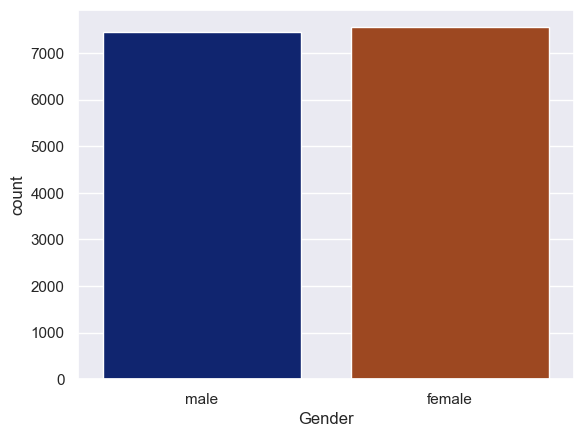

In [137]:
# plotting gender clm in count plot
sns.countplot(x="Gender", data=calories_data, palette='dark')

C:\Users\sanke\AppData\Local\Temp\ipykernel_35404\1108243178.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

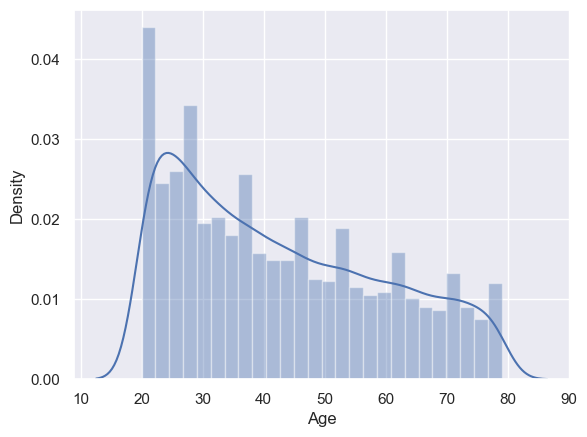

In [138]:
# finding the distribution of the Age column
sns.distplot(calories_data['Age'])

C:\Users\sanke\AppData\Local\Temp\ipykernel_35404\1194008281.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

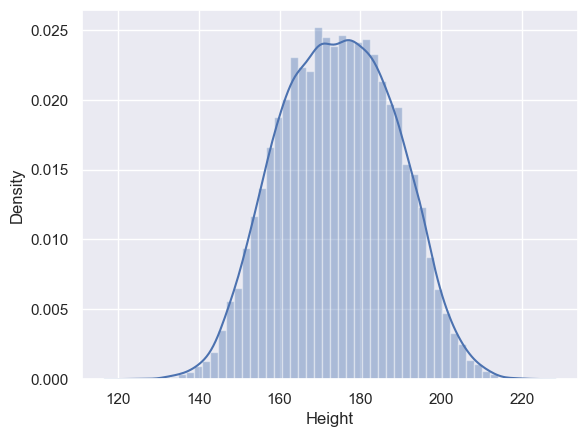

In [139]:
# finding the distribution of the Height column
sns.distplot(calories_data['Height'])

C:\Users\sanke\AppData\Local\Temp\ipykernel_35404\2928104173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

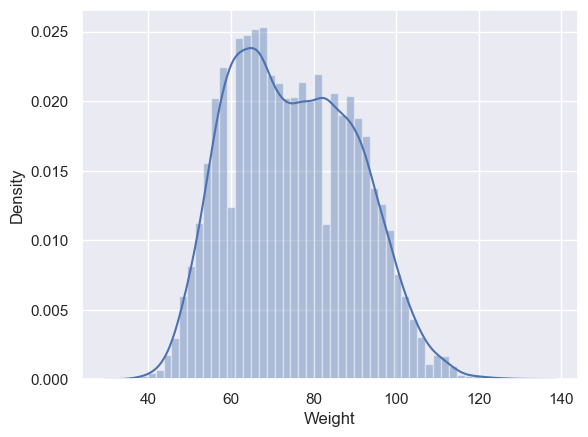

In [140]:
# finding the distribution of the Weight column
sns.distplot(calories_data['Weight'])

Finding Correlation btw dataset
1. Positive Corealtion - directly proportional faetures
2. Negavtive Correlaiton - not proportional

In [141]:
correlation = calories_data.corr(numeric_only=True)
# to make sure we are only getting numeric columns
print(correlation)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


<Axes: >

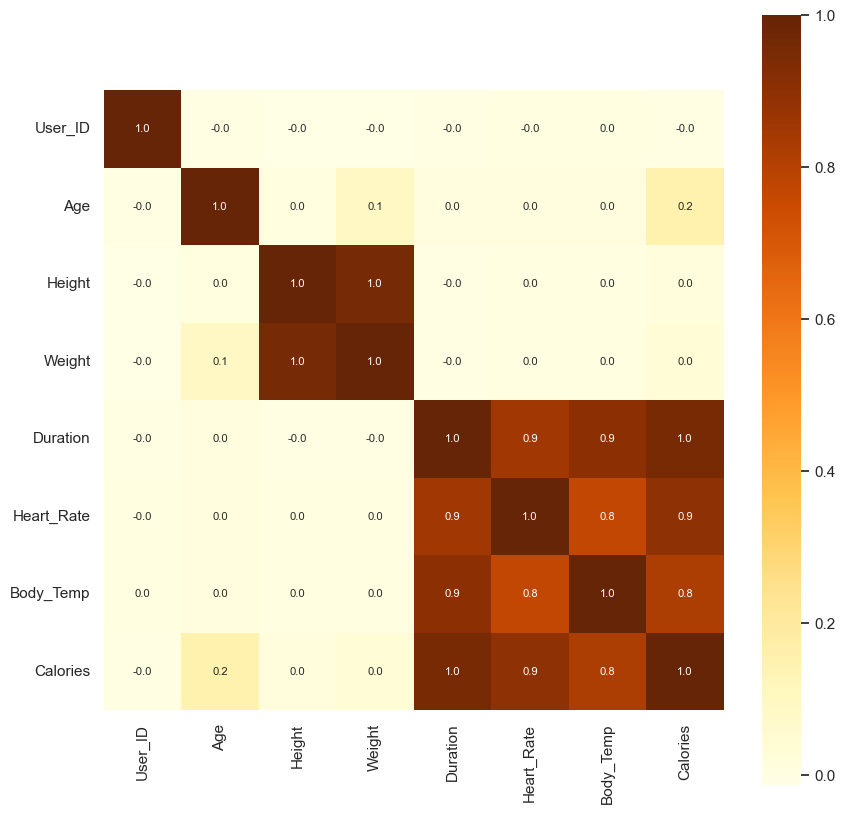

In [142]:
# constructiong heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8}, cmap='YlOrBr')

we see that Duration , Heart_Rate and Body Temp are  highly positively co-related to calories burnt

Coverting text data to numerical data- Categorical data encoding

In [143]:
calories_data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

C:\Users\sanke\AppData\Local\Temp\ipykernel_35404\2922620523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)


In [144]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating features and target column.
X = drop target clm nd unnecessary clm . y is target clm

In [145]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [146]:
print("\n Features (X):")
X.head()


 Features (X):


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [147]:
print("\n Target (Y):")
Y.head()


 Target (Y):


0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

Spiliting data into training and Test data

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [149]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [150]:
print(Y.shape, Y_train.shape, Y_test.shape)

(15000,) (12000,) (3000,)


MODEL TRAINING - XGBoost

XGBoost Regressor

In [151]:
# loading the model
# This is Hyperparameter Tuning for the XGBRegressor model. Model is much Stronger with these hyperparameters if tuned.


#model = XGBRegressor()
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)
print(model.get_xgb_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [152]:
# traing thr model eith x_train and Y_train
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Prediction on Training data

In [153]:
training_data_prediction = model.predict(X_train)

In [154]:
# R squared value  - comapring the actual values and predicted values
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value on training data:", r2_train)    

R squared value on training data: 0.9997069018084703


Predcicition on test data

In [155]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[126.289925 220.1108    38.7227   ... 145.02933   23.793709  88.39274 ]


In [156]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared value on test data:", r2_test)    

R squared value on test data: 0.9993449004971503


Mean Absolute Error : 

In [157]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.1110002801169951


In [158]:
#Cross Validation

#Instead of just one train/test split, use cross-validation:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.99926929 0.99926849 0.99941504 0.99930761 0.99928315]
Average R²: 0.999308717186231


Building a Predictive System

In [159]:
input_data = (0,69,179.0,79.0,5.0,88.0,38.7)

# chanfing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [160]:
# reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# prediction  - since its in a list - 0 index
prediction = model.predict(input_data_reshaped)
print("Predicted calories burnt:", prediction[0])

Predicted calories burnt: 25.976048


actual calories burnt was 26***

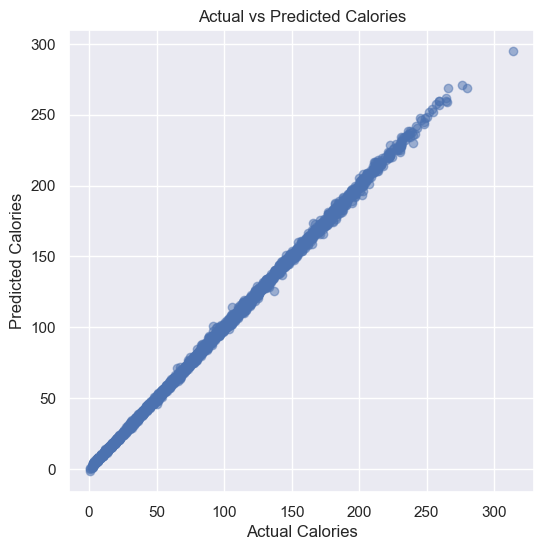

In [161]:
# Plot Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(Y_test, test_data_prediction, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

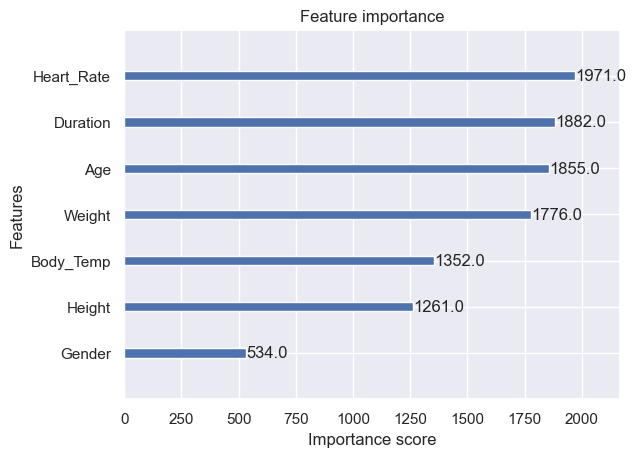

In [162]:
import xgboost as xgb

xgb.plot_importance(model, importance_type='weight')
plt.show()

MODEL TRAINNG - LINEAR REGRESSION

In [163]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Metrics
print("\nLinear Regression:")
print("Train R²:", metrics.r2_score(Y_train, lr_train_pred))
print("Test R²:", metrics.r2_score(Y_test, lr_test_pred))
print("MAE:", metrics.mean_absolute_error(Y_test, lr_test_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, lr_test_pred)))


Linear Regression:
Train R²: 0.9672762198112508
Test R²: 0.9668790377181355
MAE: 8.385188053147186
RMSE: 11.40557205325028


In [164]:
lr_prediction = lr_model.predict(input_data_reshaped)
print("Predicted calories burnt:", lr_prediction[0])

Predicted calories burnt: 40.05130927914496


c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


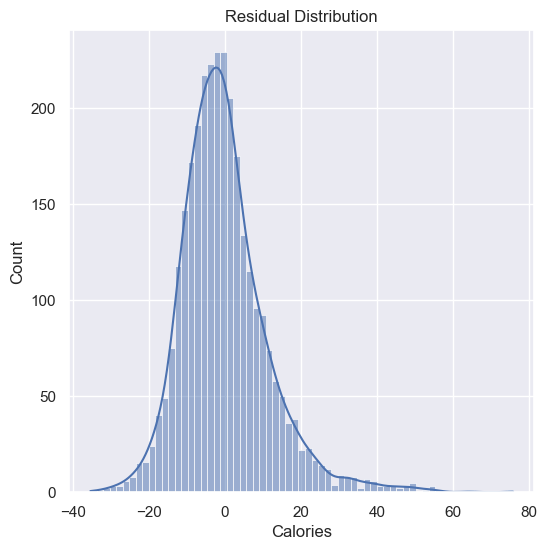

In [165]:
# Residual Analysis

residuals = Y_test - lr_test_pred

plt.figure(figsize=(6,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

📊 Compare XGBoost vs Linear Regression Side by Side

In [166]:
results = pd.DataFrame({
    "Model": ["XGBoost", "Linear Regression"],
    "Train R²": [r2_train, metrics.r2_score(Y_train, lr_train_pred)],
    "Test R²": [r2_test, metrics.r2_score(Y_test, lr_test_pred)],
    "MAE": [mae, metrics.mean_absolute_error(Y_test, lr_test_pred)],
    "RMSE": [np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction)),
             np.sqrt(metrics.mean_squared_error(Y_test, lr_test_pred))]
})

results

,Model,Train R²,Test R²,MAE,RMSE
0,XGBoost,0.999707,0.999345,1.111000,1.604055
1,Linear Regression,0.967276,0.966879,8.385188,11.405572


COMPARING BOTH MODELS USING SCATTER PLT

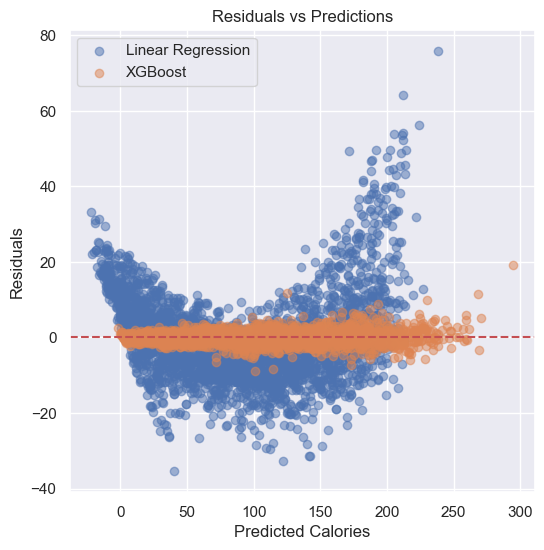

In [167]:
plt.figure(figsize=(6,6))
plt.scatter(lr_test_pred, Y_test - lr_test_pred, alpha=0.5, label="Linear Regression")
plt.scatter(test_data_prediction, Y_test - test_data_prediction, alpha=0.5, label="XGBoost")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.legend()
plt.show()
